# Unsupervised - Clustering - K-Means 



In this project, we will use cluster analysis to segment customers into clusters based on their annual income. For this, we will use Kmeans, which is one of the finest clustering algorithms out there. K-means clustering is an unsupervised learning algorithm which finds groups in data. 

## Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotliblib.pyplot as plt

## Step 2: Importing Dataset

In [2]:
dataset = pd.read_csv(r"F:\Torrent Downloads\Machine Learning A-Z™ Hands-On Python & R In Data Science\[Tutsgalaxy.com] - Machine Learning A-Z™ Hands-On Python & R In Data Science\21. K-Means Clustering\Data\K_Means\Mall_Customers.csv")

In [3]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
## Selecting the columns of interest
X = dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Step 3: Finding Optimal number of Clusters through Elbow Method

In [8]:
from sklearn.cluster import KMeans

In [11]:
### Here, first we will plot graph to know the required number of clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 200, n_init= 20, random_state= 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  ## inertia_: Sum of squared distances of samples to their closest cluster center.



Text(0, 0.5, 'WCSS')

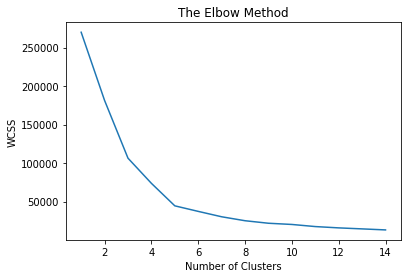

In [16]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")


Here, we can see that at K = 5 the there a little change as compared to K = 4. So, we can say that the best number of clusters for this can be considered as 5.

## Step 4: Applying K-means to the dataset

In [21]:
kmeans = KMeans(n_clusters = 5, init= 'k-means++', max_iter = 200,  random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Step 5: Visualizing the cluster

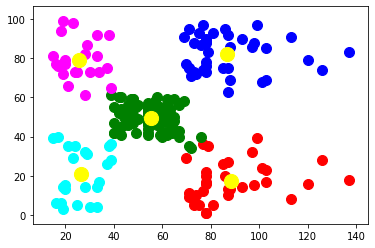

In [22]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Category_1' )
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Category_2' )
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Category_3' )
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Category_4' )
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Category_5' )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')